In [1]:
# Activate the following in colab : 
#!pip3 install netCDF4
#!apt install proj-bin libproj-dev libgeos-dev
#!pip install https://github.com/matplotlib/basemap/archive/master.zip

import pandas as pd 
import math
from datetime import datetime,date
import datetime
import numpy as np
import xarray as xr
import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs

/home/maltem/.local/lib/python3.6/site-packages/pandas/compat/_optional.py:124: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.2.0' currently installed).
  warnings.warn(msg, UserWarning)
/home/maltem/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
#era5 = pd.read_csv("https://raw.githubusercontent.com/maltemuellerm/MOSAiC/master/data/ERA5_MOSAiC_2019-2020.csv")

In [3]:
era5_sfs30 = pd.read_csv('https://raw.githubusercontent.com/maltemuellerm/MOSAiC/master/data/v02/mosasfs30_ERA5.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(era5_sfs30))):
    era5_sfs30['datetime'][i]= datetime.datetime.strptime(era5_sfs30.datetime[i], '%Y-%m-%d %H:%M:%S')

     
era5_sfs40 = pd.read_csv('https://raw.githubusercontent.com/maltemuellerm/MOSAiC/master/data/v02/mosasfs40_ERA5.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(era5_sfs40))):
    era5_sfs40['datetime'][i]= datetime.datetime.strptime(era5_sfs40.datetime[i], '%Y-%m-%d %H:%M:%S')    
    
    
era5_sfs50 = pd.read_csv('https://raw.githubusercontent.com/maltemuellerm/MOSAiC/master/data/v02/mosasfs50_ERA5.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(era5_sfs50))):
    era5_sfs50['datetime'][i]= datetime.datetime.strptime(era5_sfs50.datetime[i], '%Y-%m-%d %H:%M:%S')      

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [4]:
arome_sfs30 = pd.read_csv('https://raw.githubusercontent.com/maltemuellerm/MOSAiC/master/data/v02/mosasfs30_AROME.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(arome_sfs30))):
    arome_sfs30['datetime'][i]= datetime.datetime.strptime(arome_sfs30.datetime[i], '%Y-%m-%d %H:%M:%S')

arome_sfs40 = pd.read_csv('https://raw.githubusercontent.com/maltemuellerm/MOSAiC/master/data/v02/mosasfs40_AROME.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(arome_sfs40))):
    arome_sfs40['datetime'][i]= datetime.datetime.strptime(arome_sfs40.datetime[i], '%Y-%m-%d %H:%M:%S')    
    
arome_sfs50 = pd.read_csv('https://raw.githubusercontent.com/maltemuellerm/MOSAiC/master/data/v02/mosasfs50_AROME.csv')
# Fixing the different time axis representations:
for i in range(np.max(np.shape(arome_sfs50))):
    arome_sfs50['datetime'][i]= datetime.datetime.strptime(arome_sfs50.datetime[i], '%Y-%m-%d %H:%M:%S')    
    

/usr/lib/python3/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/lib/python3/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


#### Load observations

In [5]:
mosasfs30met = xr.open_dataset("https://thredds.met.no/thredds/dodsC/metusers/maltem/MOSAiC/mosasfs30met.level2.10min.all.nc")
mosasfs40met = xr.open_dataset("https://thredds.met.no/thredds/dodsC/metusers/maltem/MOSAiC/mosasfs40met.level2.10min.all.nc")
mosasfs50met = xr.open_dataset("https://thredds.met.no/thredds/dodsC/metusers/maltem/MOSAiC/mosasfs50met.level2.10min.all.nc")

In [ ]:
#idir='/lustre/storeB/users/maltem/nowwind/MOSAiC/'
#mosasfs30met = xr.open_dataset(idir+"mosasfs30met.level2.10min.all.nc")
#mosasfs40met = xr.open_dataset(idir+"mosasfs40met.level2.10min.all.nc")
#mosasfs50met = xr.open_dataset(idir+"mosasfs50met.level2.10min.all.nc")

#### Interpolate to hourly values

In [6]:
mosasfs30met_1h = mosasfs30met.resample(time="1H").interpolate("linear")
mosasfs40met_1h = mosasfs40met.resample(time="1H").interpolate("linear")
mosasfs50met_1h = mosasfs50met.resample(time="1H").interpolate("linear")

In [6]:
mosasfs40met_1h

<xarray.Dataset>
Dimensions:                  (time: 3504)
Coordinates:
  * time                     (time) datetime64[ns] 2019-10-05 ... 2020-02-27T...
Data variables:
    lat                      (time) float64 nan nan nan nan ... nan nan nan nan
    lon                      (time) float64 nan nan nan nan ... nan nan nan nan
    heading                  (time) float64 nan nan nan nan ... nan nan nan nan
    zenith_true              (time) float64 nan nan nan nan ... nan nan nan nan
    zenith_apparent          (time) float64 nan nan nan nan ... nan nan nan nan
    azimuth                  (time) float64 nan nan nan nan ... nan nan nan nan
    ship_distance            (time) float64 nan nan nan nan ... nan nan nan nan
    ship_bearing             (time) float64 nan nan nan nan ... nan nan nan nan
    sr50_dist                (time) float64 nan nan nan nan ... nan nan nan nan
    snow_depth               (time) float64 nan nan nan nan ... nan nan nan nan
    atmos_pressure           (time) float64 nan nan nan nan ... nan nan nan nan
    temp                     (time) float64 nan nan nan nan ... nan nan nan nan
    rh                       (time) float64 nan nan nan nan ... nan nan nan nan
    dew_point                (time) float64 nan nan nan nan ... nan nan nan nan
    mixing_ratio             (time) float64 nan nan nan nan ... nan nan nan nan
    vapor_pressure           (time) float64 nan nan nan nan ... nan nan nan nan
    rhi                      (time) float64 nan nan nan nan ... nan nan nan nan
    brightness_temp_surface  (time) float64 nan nan nan nan ... nan nan nan nan
    skin_temp_surface        (time) float64 nan nan nan nan ... nan nan nan nan
    subsurface_heat_flux_A   (time) float64 nan nan nan nan ... nan nan nan nan
    subsurface_heat_flux_B   (time) float64 nan nan nan nan ... nan nan nan nan
    wspd_vec_mean            (time) float64 nan nan nan nan ... nan nan nan nan
    wdir_vec_mean            (time) float64 nan nan nan nan ... nan nan nan nan
    acoustic_temp            (time) float64 nan nan nan nan ... nan nan nan nan
    h2o_licor                (time) float64 nan nan nan nan ... nan nan nan nan
    co2_licor                (time) float64 nan nan nan nan ... nan nan nan nan
    down_long_hemisp         (time) float64 nan nan nan nan ... nan nan nan nan
    down_short_hemisp        (time) float64 nan nan nan nan ... nan nan nan nan
    up_long_hemisp           (time) float64 nan nan nan nan ... nan nan nan nan
    up_short_hemisp          (time) float64 nan nan nan nan ... nan nan nan nan
    net_radiation            (time) float64 nan nan nan nan ... nan nan nan nan
Attributes:
    CDI:                             Climate Data Interface version ?? (http:...
    Conventions:                     CF-1.4
    history:                         Mon Feb 08 12:21:12 2021: cdo mergetime ...
    source:                          Observations made during the MOSAiC drif...
    institution:                     CIRES, University of Colorado and NOAA P...
    date_created:                    Fri Jan 15 19:42:06 2021
    title:                           MOSAiC flux group data product: 
    contact:                         Matthew Shupe, University of Colorado, m...
    file_creator:                    Michael R. Gallagher; Christopher J. Cox
    creator_email:                   michael.r.gallagher@noaa.gov; christophe...
    project:                         MOSAiC, PS-122: Thermodynamic and Dynami...
    Funding:                         Funding sources: National Science Founda...
    system:                          asfs40
    keywords:                        Polar, Arctic, Supersite, Observations, ...
    conventions:                     cf convention variable naming as attribu...
    version:                         1.5, 1/8/2020
    quality_control:                 Significant quality control in place for...
    CDO:                             Climate Data Operators version 1.7.0 (ht...
    DODS_EXTRA.Unl

### MOSAiC

-84.7986405831643 24.98929196842705 968.4911429999999 1040.5245869999999


Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

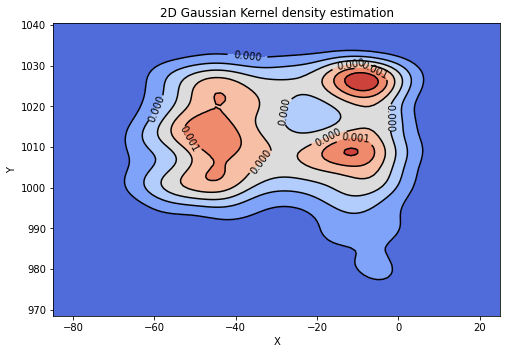

In [10]:
#Grid two variables on a 2D meshgrid 
import matplotlib.pyplot as plt
# Extract x and y
x = np.array(mosasfs40met_1h['down_long_hemisp']-mosasfs40met_1h['up_long_hemisp'])
#x = np.array(mosasfs40met_1h['wspd_vec_mean'])
#y = np.array(mosasfs40met_1h['skin_temp_surface'])
#Y = np.array(mosasfs40met_1h['atmos_pressure'])
y = np.array(mosasfs40met_1h['atmos_pressure'])
# Remove all the nans consistently 
y = y[~np.isnan(x)]
x = x[~np.isnan(x)]
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

# Fit a kernel
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

# Plot

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

### ERA-5

-92.58776172222221 22.483912277777776 970.9075300000001 1040.51317


Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

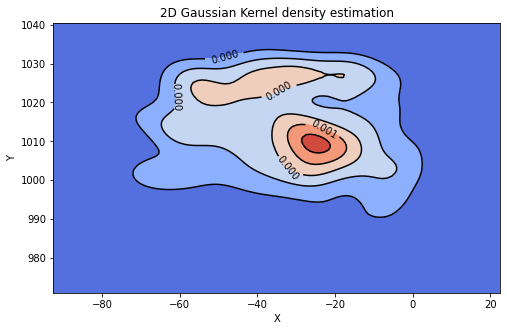

In [12]:
#Grid two variables on a 2D meshgrid 

# Extract x and y
x = np.array(era5_sfs40['stru']/3600)
#y = np.array(era5_sfs40['skin_temp_surface'])
y = np.array(era5_sfs40['sp']/100)
#y = np.array(np.sqrt(era5_sfs40['u10m']**2+era5_sfs40['v10m']**2))
# Remove all the nans consistently 
y = y[~np.isnan(x)]
x = x[~np.isnan(x)]
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

# Fit a kernel
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

# Plot

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')

### AROME Daten

-116.61581944444445 32.637347222222225 971.6477578125 1040.6971640625


Text(0.5, 1.0, '2D Gaussian Kernel density estimation')

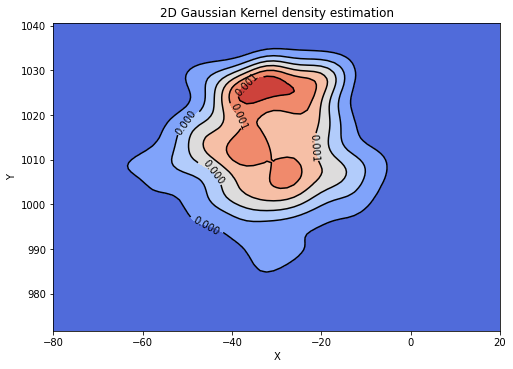

In [13]:

#Grid two variables on a 2D meshgrid 

# Extract x and y
x = np.array((arome_sfs40['strn'])/3600)
#y = np.array(era5_sfs40['skin_temp_surface'])
y = np.array(arome_sfs40['sp']/100)
#y = np.array(np.sqrt(era5_sfs40['u10m']**2+era5_sfs40['v10m']**2))
# Remove all the nans consistently 
y = y[~np.isnan(x)]
x = x[~np.isnan(x)]
x = x[~np.isnan(y)]
y = y[~np.isnan(y)]
# Define the borders
deltaX = (max(x) - min(x))/10
deltaY = (max(y) - min(y))/10
xmin = min(x) - deltaX
xmax = max(x) + deltaX
ymin = min(y) - deltaY
ymax = max(y) + deltaY
print(xmin, xmax, ymin, ymax)
# Create meshgrid
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

# Fit a kernel
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])
kernel = st.gaussian_kde(values)
f = np.reshape(kernel(positions).T, xx.shape)

# Plot

fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_xlim(xmin, xmax)
ax.set_xlim(-80, 20)

ax.set_ylim(ymin, ymax)
cfset = ax.contourf(xx, yy, f, cmap='coolwarm')
ax.imshow(np.rot90(f), cmap='coolwarm', extent=[xmin, xmax, ymin, ymax])
cset = ax.contour(xx, yy, f, colors='k')
ax.clabel(cset, inline=1, fontsize=10)
ax.set_xlabel('X')
ax.set_ylabel('Y')
plt.title('2D Gaussian Kernel density estimation')